In [1]:
import sys

sys.path.append("C:\\Users\\Gabija\\anaconda3\\Lib\\site-packages")
import nb_black

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Image
import myfunctions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from csv import QUOTE_NONNUMERIC, QUOTE_NONE

%matplotlib inline
import warnings


from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from IPython.display import Audio

sound_file = "button-13.wav"
set_config(transform_output="pandas")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Setup complete")

Setup complete


<IPython.core.display.Javascript object>

## POS_CASH_balance Table Analysis

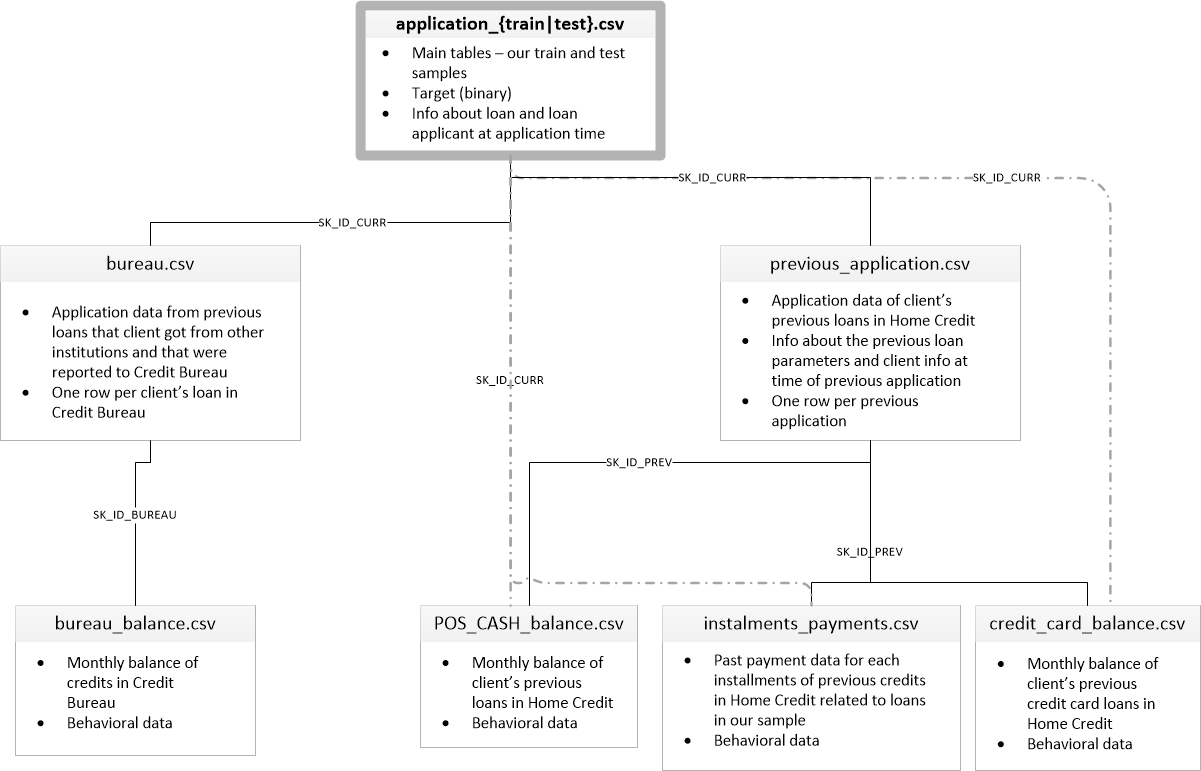

<IPython.core.display.Javascript object>

In [3]:
Image(filename="home_credit.png")

In [4]:
columns_description = pd.read_csv(
    "HomeCredit_columns_description.csv",
    encoding="latin-1",
    usecols=["Table", "Row", "Description"],
)
columns_description.style.set_properties(subset=["Description"], **{"width": "1000px"})

,Table,Row,Description
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample
1,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_{train|test}.csv,CODE_GENDER,Gender of the client
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car
5,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has
7,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client
8,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan
9,application_{train|test}.csv,AMT_ANNUITY,Loan annuity


<IPython.core.display.Javascript object>

* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans)

In [3]:
posh = pd.read_csv("POS_CASH_balance.csv")
posh = myfunctions.reduce_mem_usage(posh)
print("Size of POS_CASH_balance table", posh.shape)
posh.head()

Size of POS_CASH_balance table (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


<IPython.core.display.Javascript object>

In [4]:
posh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int32  
 1   SK_ID_CURR             int32  
 2   MONTHS_BALANCE         int8   
 3   CNT_INSTALMENT         float16
 4   CNT_INSTALMENT_FUTURE  float16
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int16  
 7   SK_DPD_DEF             int16  
dtypes: float16(2), int16(2), int32(2), int8(1), object(1)
memory usage: 238.5+ MB


<IPython.core.display.Javascript object>

In [7]:
posh.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF']

<IPython.core.display.Javascript object>

In [8]:
numeric_columns = [
    "MONTHS_BALANCE",
    "CNT_INSTALMENT",
    "CNT_INSTALMENT_FUTURE",
    "SK_DPD",
    "SK_DPD_DEF",
]
categorical_columns = ["NAME_CONTRACT_STATUS"]

<IPython.core.display.Javascript object>

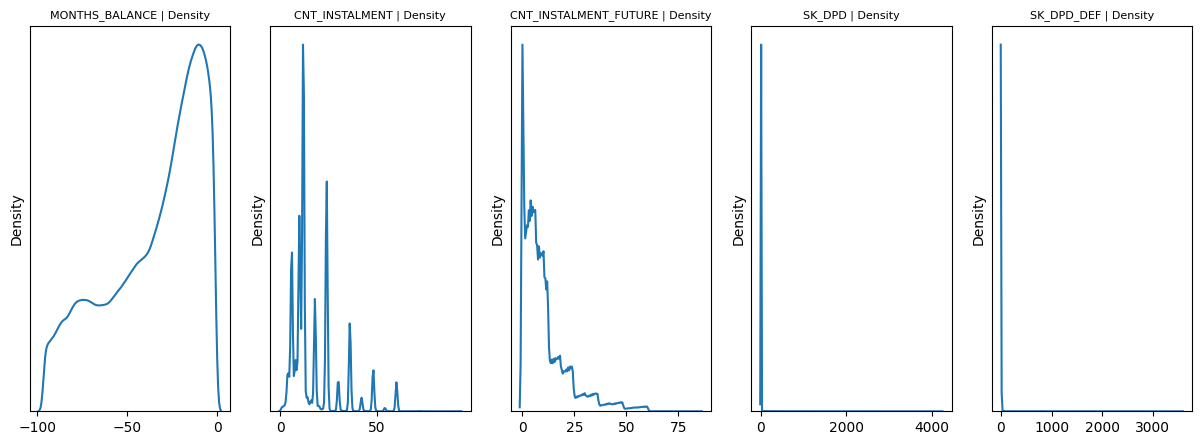

<IPython.core.display.Javascript object>

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, col in enumerate(numeric_columns[:5]):
    sns.kdeplot(np.array(posh[str(col)]), ax=axes[i])
    axes[i].set_yticklabels([])
    axes[i].set_yticks([])
    axes[i].set_title(str(col) + " | Density", fontsize=8)
plt.show()

In [9]:
posh.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9975287.0,9975271.0,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,NaN,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,0.0,0.0,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.0,0.0,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,10.0,3.0,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,12.0,7.0,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,24.0,14.0,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,92.0,85.0,4.231000e+03,3.595000e+03


<IPython.core.display.Javascript object>

In [9]:
myfunctions.single_value_features(posh)

[]

<IPython.core.display.Javascript object>

In [10]:
myfunctions.missing_values_summary(posh)

There are 2 columns that have missing values.


,Missing Values,% of Total Values,type
CNT_INSTALMENT_FUTURE,26087,0.2608,float16
CNT_INSTALMENT,26071,0.2607,float16


<IPython.core.display.Javascript object>

In [11]:
posh["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
# single client example:
posh[posh["SK_ID_CURR"] == 182943].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
750221,1803195,182943,-17,48.0,31.0,Active,0,0
861808,1803195,182943,-21,48.0,35.0,Active,0,0
925513,1803195,182943,-8,48.0,21.0,Active,0,0
1120907,1803195,182943,-4,48.0,17.0,Active,0,0


<IPython.core.display.Javascript object>

Smallest number of loans per client history in HC:  1
Largest number of loans per client history in HC:  295


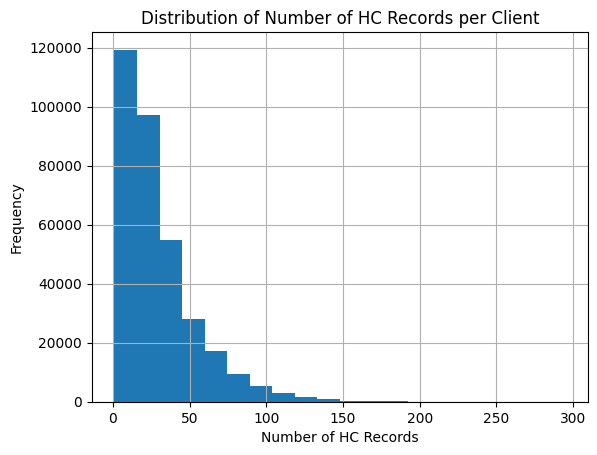

<IPython.core.display.Javascript object>

In [23]:
print(
    "Smallest number of loans per client history in HC: ",
    posh.groupby("SK_ID_CURR")["SK_ID_PREV"].count().min(),
)
print(
    "Largest number of loans per client history in HC: ",
    posh.groupby("SK_ID_CURR")["SK_ID_PREV"].count().max(),
)
posh.groupby("SK_ID_CURR")["SK_ID_PREV"].count().hist(bins=20)
plt.title("Distribution of Number of HC Records per Client")
plt.xlabel("Number of HC Records")
plt.ylabel("Frequency")
plt.show()

* Create features via OneHotencoder and aggregating additional features:

In [4]:
transformer = ColumnTransformer(
    transformers=[
        (
            "encode",
            OneHotEncoder(sparse=False),
            ["NAME_CONTRACT_STATUS"],
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)
posh = transformer.fit_transform(posh)
posh = posh.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "", x))
posh = myfunctions.reduce_mem_usage(posh)

<IPython.core.display.Javascript object>

In [20]:
posh.head()

,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortizeddebt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returnedtothestore,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1803195,182943,-31,48.0,45.0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1715348,367990,-33,36.0,35.0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1784872,397406,-32,12.0,9.0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1903291,269225,-35,48.0,42.0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2341044,334279,-35,36.0,35.0,0,0


<IPython.core.display.Javascript object>

In [21]:
posh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 16 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   NAME_CONTRACT_STATUS_Active              float16
 1   NAME_CONTRACT_STATUS_Amortizeddebt       float16
 2   NAME_CONTRACT_STATUS_Approved            float16
 3   NAME_CONTRACT_STATUS_Canceled            float16
 4   NAME_CONTRACT_STATUS_Completed           float16
 5   NAME_CONTRACT_STATUS_Demand              float16
 6   NAME_CONTRACT_STATUS_Returnedtothestore  float16
 7   NAME_CONTRACT_STATUS_Signed              float16
 8   NAME_CONTRACT_STATUS_XNA                 float16
 9   SK_ID_PREV                               int32  
 10  SK_ID_CURR                               int32  
 11  MONTHS_BALANCE                           int8   
 12  CNT_INSTALMENT                           float16
 13  CNT_INSTALMENT_FUTURE                    float16
 14  SK_DPD          

<IPython.core.display.Javascript object>

In [5]:
transform_posh = FunctionTransformer(myfunctions.posh_active_features)
aggregate_posh = Pipeline(steps=[("aggregate_new", transform_posh)])
posh_agg = aggregate_posh.fit_transform(posh)
print(posh_agg.shape)
posh_agg.head()

(337034, 109)


,SK_ID_CURR,POS_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,POS_ACTIVE_MONTHS_BALANCE_MIN,POS_ACTIVE_MONTHS_BALANCE_MAX,POS_ACTIVE_MONTHS_BALANCE_SIZE,POS_ACTIVE_CNT_INSTALMENT_MEAN,POS_ACTIVE_CNT_INSTALMENT_MEDIAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_MEAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_SUM,POS_ACTIVE_SK_DPD_MEAN,POS_ACTIVE_SK_DPD_MAX,POS_ACTIVE_SK_DPD_DEF_MEAN,POS_ACTIVE_SK_DPD_DEF_MAX,POS_AMORTIZE_NAME_CONTRACT_STATUS_Amortizeddebt_SUM,POS_AMORTIZE_MONTHS_BALANCE_MIN,POS_AMORTIZE_MONTHS_BALANCE_MAX,POS_AMORTIZE_MONTHS_BALANCE_SIZE,POS_AMORTIZE_CNT_INSTALMENT_MEAN,POS_AMORTIZE_CNT_INSTALMENT_MEDIAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_MEAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_SUM,POS_AMORTIZE_SK_DPD_MEAN,POS_AMORTIZE_SK_DPD_MAX,POS_AMORTIZE_SK_DPD_DEF_MEAN,POS_AMORTIZE_SK_DPD_DEF_MAX,POS_APP_NAME_CONTRACT_STATUS_Approved_SUM,POS_APP_MONTHS_BALANCE_MIN,POS_APP_MONTHS_BALANCE_MAX,POS_APP_MONTHS_BALANCE_SIZE,POS_APP_CNT_INSTALMENT_MEAN,POS_APP_CNT_INSTALMENT_MEDIAN,POS_APP_CNT_INSTALMENT_FUTURE_MEAN,POS_APP_CNT_INSTALMENT_FUTURE_SUM,POS_APP_SK_DPD_MEAN,POS_APP_SK_DPD_MAX,POS_APP_SK_DPD_DEF_MEAN,POS_APP_SK_DPD_DEF_MAX,POS_CANC_NAME_CONTRACT_STATUS_Canceled_SUM,POS_CANC_MONTHS_BALANCE_MIN,POS_CANC_MONTHS_BALANCE_MAX,POS_CANC_MONTHS_BALANCE_SIZE,POS_CANC_CNT_INSTALMENT_MEAN,POS_CANC_CNT_INSTALMENT_MEDIAN,POS_CANC_CNT_INSTALMENT_FUTURE_MEAN,POS_CANC_CNT_INSTALMENT_FUTURE_SUM,POS_CANC_SK_DPD_MEAN,POS_CANC_SK_DPD_MAX,POS_CANC_SK_DPD_DEF_MEAN,POS_CANC_SK_DPD_DEF_MAX,POS_COMPL_NAME_CONTRACT_STATUS_Completed_SUM,POS_COMPL_MONTHS_BALANCE_MIN,POS_COMPL_MONTHS_BALANCE_MAX,POS_COMPL_MONTHS_BALANCE_SIZE,POS_COMPL_CNT_INSTALMENT_MEAN,POS_COMPL_CNT_INSTALMENT_MEDIAN,POS_COMPL_CNT_INSTALMENT_FUTURE_MEAN,POS_COMPL_CNT_INSTALMENT_FUTURE_SUM,POS_COMPL_SK_DPD_MEAN,POS_COMPL_SK_DPD_MAX,POS_COMPL_SK_DPD_DEF_MEAN,POS_COMPL_SK_DPD_DEF_MAX,POS_DEM_NAME_CONTRACT_STATUS_Demand_SUM,POS_DEM_MONTHS_BALANCE_MIN,POS_DEM_MONTHS_BALANCE_MAX,POS_DEM_MONTHS_BALANCE_SIZE,POS_DEM_CNT_INSTALMENT_MEAN,POS_DEM_CNT_INSTALMENT_MEDIAN,POS_DEM_CNT_INSTALMENT_FUTURE_MEAN,POS_DEM_CNT_INSTALMENT_FUTURE_SUM,POS_DEM_SK_DPD_MEAN,POS_DEM_SK_DPD_MAX,POS_DEM_SK_DPD_DEF_MEAN,POS_DEM_SK_DPD_DEF_MAX,POS_RET_NAME_CONTRACT_STATUS_Returnedtothestore_SUM,POS_RET_MONTHS_BALANCE_MIN,POS_RET_MONTHS_BALANCE_MAX,POS_RET_MONTHS_BALANCE_SIZE,POS_RET_CNT_INSTALMENT_MEAN,POS_RET_CNT_INSTALMENT_MEDIAN,POS_RET_CNT_INSTALMENT_FUTURE_MEAN,POS_RET_CNT_INSTALMENT_FUTURE_SUM,POS_RET_SK_DPD_MEAN,POS_RET_SK_DPD_MAX,POS_RET_SK_DPD_DEF_MEAN,POS_RET_SK_DPD_DEF_MAX,POS_SIGN_NAME_CONTRACT_STATUS_Signed_SUM,POS_SIGN_MONTHS_BALANCE_MIN,POS_SIGN_MONTHS_BALANCE_MAX,POS_SIGN_MONTHS_BALANCE_SIZE,POS_SIGN_CNT_INSTALMENT_MEAN,POS_SIGN_CNT_INSTALMENT_MEDIAN,POS_SIGN_CNT_INSTALMENT_FUTURE_MEAN,POS_SIGN_CNT_INSTALMENT_FUTURE_SUM,POS_SIGN_SK_DPD_MEAN,POS_SIGN_SK_DPD_MAX,POS_SIGN_SK_DPD_DEF_MEAN,POS_SIGN_SK_DPD_DEF_MAX,POS_XNA_NAME_CONTRACT_STATUS_XNA_SUM,POS_XNA_MONTHS_BALANCE_MIN,POS_XNA_MONTHS_BALANCE_MAX,POS_XNA_MONTHS_BALANCE_SIZE,POS_XNA_CNT_INSTALMENT_MEAN,POS_XNA_CNT_INSTALMENT_MEDIAN,POS_XNA_CNT_INSTALMENT_FUTURE_MEAN,POS_XNA_CNT_INSTALMENT_FUTURE_SUM,POS_XNA_SK_DPD_MEAN,POS_XNA_SK_DPD_MAX,POS_XNA_SK_DPD_DEF_MEAN,POS_XNA_SK_DPD_DEF_MAX
0,100001,7.0,-96,-54,7,4.000000,4.0,1.857143,13.0,1.0,7,1.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-93.0,-53.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,19.0,-19,-1,19,24.000000,24.0,15.000000,285.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<IPython.core.display.Javascript object>

In [6]:
posh_agg["POS_AMORTIZE_CNT_INSTALMENT_MEDIAN"].value_counts()

POS_AMORTIZE_CNT_INSTALMENT_MEDIAN
10.0    5
6.0     4
7.0     2
11.0    2
4.0     2
12.0    1
5.0     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [5]:
transform_posh = FunctionTransformer(myfunctions.posh_active_features)
aggregate_posh = Pipeline(steps=[("aggregate_new", transform_posh)])
posh_agg = aggregate_posh.fit(posh)
posh_agg = aggregate_posh.transform(posh)
print(posh_agg.shape)
posh_agg.head()

(337034, 12)


,POS_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,POS_ACTIVE_MONTHS_BALANCE_MIN,POS_ACTIVE_MONTHS_BALANCE_MAX,POS_ACTIVE_MONTHS_BALANCE_SIZE,POS_ACTIVE_CNT_INSTALMENT_MEAN,POS_ACTIVE_CNT_INSTALMENT_MEDIAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_MEAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_SUM,POS_ACTIVE_SK_DPD_MEAN,POS_ACTIVE_SK_DPD_MAX,POS_ACTIVE_SK_DPD_DEF_MEAN,POS_ACTIVE_SK_DPD_DEF_MAX
SK_ID_CURR,,,,,,,,,,,,
100001,7.0,-96,-54,7,4.000000,4.0,1.857143,13.0,1.0,7,1.0,7
100002,19.0,-19,-1,19,24.000000,24.0,15.000000,285.0,0.0,0,0.0,0
100003,26.0,-77,-19,26,10.384615,12.0,6.230769,162.0,0.0,0,0.0,0
100004,3.0,-27,-25,3,4.000000,4.0,3.000000,9.0,0.0,0,0.0,0
100005,9.0,-24,-16,9,12.000000,12.0,8.000000,72.0,0.0,0,0.0,0


<IPython.core.display.Javascript object>

In [7]:
# getting "TARGET" column from application_train table:
application_train = pd.read_csv("application_train.csv")
application_train = myfunctions.reduce_mem_usage(application_train)

<IPython.core.display.Javascript object>

In [9]:
posh_target = pd.merge(
    posh_agg,
    application_train[["SK_ID_CURR", "TARGET"]],
    how="left",
    on="SK_ID_CURR")
posh_target.head()

,SK_ID_CURR,POS_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,POS_ACTIVE_MONTHS_BALANCE_MIN,POS_ACTIVE_MONTHS_BALANCE_MAX,POS_ACTIVE_MONTHS_BALANCE_SIZE,POS_ACTIVE_CNT_INSTALMENT_MEAN,POS_ACTIVE_CNT_INSTALMENT_MEDIAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_MEAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_SUM,POS_ACTIVE_SK_DPD_MEAN,POS_ACTIVE_SK_DPD_MAX,POS_ACTIVE_SK_DPD_DEF_MEAN,POS_ACTIVE_SK_DPD_DEF_MAX,POS_AMORTIZE_NAME_CONTRACT_STATUS_Amortizeddebt_SUM,POS_AMORTIZE_MONTHS_BALANCE_MIN,POS_AMORTIZE_MONTHS_BALANCE_MAX,POS_AMORTIZE_MONTHS_BALANCE_SIZE,POS_AMORTIZE_CNT_INSTALMENT_MEAN,POS_AMORTIZE_CNT_INSTALMENT_MEDIAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_MEAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_SUM,POS_AMORTIZE_SK_DPD_MEAN,POS_AMORTIZE_SK_DPD_MAX,POS_AMORTIZE_SK_DPD_DEF_MEAN,POS_AMORTIZE_SK_DPD_DEF_MAX,POS_APP_NAME_CONTRACT_STATUS_Approved_SUM,POS_APP_MONTHS_BALANCE_MIN,POS_APP_MONTHS_BALANCE_MAX,POS_APP_MONTHS_BALANCE_SIZE,POS_APP_CNT_INSTALMENT_MEAN,POS_APP_CNT_INSTALMENT_MEDIAN,POS_APP_CNT_INSTALMENT_FUTURE_MEAN,POS_APP_CNT_INSTALMENT_FUTURE_SUM,POS_APP_SK_DPD_MEAN,POS_APP_SK_DPD_MAX,POS_APP_SK_DPD_DEF_MEAN,POS_APP_SK_DPD_DEF_MAX,POS_CANC_NAME_CONTRACT_STATUS_Canceled_SUM,POS_CANC_MONTHS_BALANCE_MIN,POS_CANC_MONTHS_BALANCE_MAX,POS_CANC_MONTHS_BALANCE_SIZE,POS_CANC_CNT_INSTALMENT_MEAN,POS_CANC_CNT_INSTALMENT_MEDIAN,POS_CANC_CNT_INSTALMENT_FUTURE_MEAN,POS_CANC_CNT_INSTALMENT_FUTURE_SUM,POS_CANC_SK_DPD_MEAN,POS_CANC_SK_DPD_MAX,POS_CANC_SK_DPD_DEF_MEAN,POS_CANC_SK_DPD_DEF_MAX,POS_COMPL_NAME_CONTRACT_STATUS_Completed_SUM,POS_COMPL_MONTHS_BALANCE_MIN,POS_COMPL_MONTHS_BALANCE_MAX,POS_COMPL_MONTHS_BALANCE_SIZE,POS_COMPL_CNT_INSTALMENT_MEAN,POS_COMPL_CNT_INSTALMENT_MEDIAN,POS_COMPL_CNT_INSTALMENT_FUTURE_MEAN,POS_COMPL_CNT_INSTALMENT_FUTURE_SUM,POS_COMPL_SK_DPD_MEAN,POS_COMPL_SK_DPD_MAX,POS_COMPL_SK_DPD_DEF_MEAN,POS_COMPL_SK_DPD_DEF_MAX,POS_DEM_NAME_CONTRACT_STATUS_Demand_SUM,POS_DEM_MONTHS_BALANCE_MIN,POS_DEM_MONTHS_BALANCE_MAX,POS_DEM_MONTHS_BALANCE_SIZE,POS_DEM_CNT_INSTALMENT_MEAN,POS_DEM_CNT_INSTALMENT_MEDIAN,POS_DEM_CNT_INSTALMENT_FUTURE_MEAN,POS_DEM_CNT_INSTALMENT_FUTURE_SUM,POS_DEM_SK_DPD_MEAN,POS_DEM_SK_DPD_MAX,POS_DEM_SK_DPD_DEF_MEAN,POS_DEM_SK_DPD_DEF_MAX,POS_RET_NAME_CONTRACT_STATUS_Returnedtothestore_SUM,POS_RET_MONTHS_BALANCE_MIN,POS_RET_MONTHS_BALANCE_MAX,POS_RET_MONTHS_BALANCE_SIZE,POS_RET_CNT_INSTALMENT_MEAN,POS_RET_CNT_INSTALMENT_MEDIAN,POS_RET_CNT_INSTALMENT_FUTURE_MEAN,POS_RET_CNT_INSTALMENT_FUTURE_SUM,POS_RET_SK_DPD_MEAN,POS_RET_SK_DPD_MAX,POS_RET_SK_DPD_DEF_MEAN,POS_RET_SK_DPD_DEF_MAX,POS_SIGN_NAME_CONTRACT_STATUS_Signed_SUM,POS_SIGN_MONTHS_BALANCE_MIN,POS_SIGN_MONTHS_BALANCE_MAX,POS_SIGN_MONTHS_BALANCE_SIZE,POS_SIGN_CNT_INSTALMENT_MEAN,POS_SIGN_CNT_INSTALMENT_MEDIAN,POS_SIGN_CNT_INSTALMENT_FUTURE_MEAN,POS_SIGN_CNT_INSTALMENT_FUTURE_SUM,POS_SIGN_SK_DPD_MEAN,POS_SIGN_SK_DPD_MAX,POS_SIGN_SK_DPD_DEF_MEAN,POS_SIGN_SK_DPD_DEF_MAX,POS_XNA_NAME_CONTRACT_STATUS_XNA_SUM,POS_XNA_MONTHS_BALANCE_MIN,POS_XNA_MONTHS_BALANCE_MAX,POS_XNA_MONTHS_BALANCE_SIZE,POS_XNA_CNT_INSTALMENT_MEAN,POS_XNA_CNT_INSTALMENT_MEDIAN,POS_XNA_CNT_INSTALMENT_FUTURE_MEAN,POS_XNA_CNT_INSTALMENT_FUTURE_SUM,POS_XNA_SK_DPD_MEAN,POS_XNA_SK_DPD_MAX,POS_XNA_SK_DPD_DEF_MEAN,POS_XNA_SK_DPD_DEF_MAX,TARGET
0,100001,7.0,-96,-54,7,4.000000,4.0,1.857143,13.0,1.0,7,1.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-93.0,-53.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,19.0,-19,-1,19,24.000000,24.0,15.000000,285.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

<IPython.core.display.Javascript object>

In [13]:
posh_target[posh_target["TARGET"].isna()].head()

,SK_ID_CURR,POS_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,POS_ACTIVE_MONTHS_BALANCE_MIN,POS_ACTIVE_MONTHS_BALANCE_MAX,POS_ACTIVE_MONTHS_BALANCE_SIZE,POS_ACTIVE_CNT_INSTALMENT_MEAN,POS_ACTIVE_CNT_INSTALMENT_MEDIAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_MEAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_SUM,POS_ACTIVE_SK_DPD_MEAN,POS_ACTIVE_SK_DPD_MAX,POS_ACTIVE_SK_DPD_DEF_MEAN,POS_ACTIVE_SK_DPD_DEF_MAX,POS_AMORTIZE_NAME_CONTRACT_STATUS_Amortizeddebt_SUM,POS_AMORTIZE_MONTHS_BALANCE_MIN,POS_AMORTIZE_MONTHS_BALANCE_MAX,POS_AMORTIZE_MONTHS_BALANCE_SIZE,POS_AMORTIZE_CNT_INSTALMENT_MEAN,POS_AMORTIZE_CNT_INSTALMENT_MEDIAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_MEAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_SUM,POS_AMORTIZE_SK_DPD_MEAN,POS_AMORTIZE_SK_DPD_MAX,POS_AMORTIZE_SK_DPD_DEF_MEAN,POS_AMORTIZE_SK_DPD_DEF_MAX,POS_APP_NAME_CONTRACT_STATUS_Approved_SUM,POS_APP_MONTHS_BALANCE_MIN,POS_APP_MONTHS_BALANCE_MAX,POS_APP_MONTHS_BALANCE_SIZE,POS_APP_CNT_INSTALMENT_MEAN,POS_APP_CNT_INSTALMENT_MEDIAN,POS_APP_CNT_INSTALMENT_FUTURE_MEAN,POS_APP_CNT_INSTALMENT_FUTURE_SUM,POS_APP_SK_DPD_MEAN,POS_APP_SK_DPD_MAX,POS_APP_SK_DPD_DEF_MEAN,POS_APP_SK_DPD_DEF_MAX,POS_CANC_NAME_CONTRACT_STATUS_Canceled_SUM,POS_CANC_MONTHS_BALANCE_MIN,POS_CANC_MONTHS_BALANCE_MAX,POS_CANC_MONTHS_BALANCE_SIZE,POS_CANC_CNT_INSTALMENT_MEAN,POS_CANC_CNT_INSTALMENT_MEDIAN,POS_CANC_CNT_INSTALMENT_FUTURE_MEAN,POS_CANC_CNT_INSTALMENT_FUTURE_SUM,POS_CANC_SK_DPD_MEAN,POS_CANC_SK_DPD_MAX,POS_CANC_SK_DPD_DEF_MEAN,POS_CANC_SK_DPD_DEF_MAX,POS_COMPL_NAME_CONTRACT_STATUS_Completed_SUM,POS_COMPL_MONTHS_BALANCE_MIN,POS_COMPL_MONTHS_BALANCE_MAX,POS_COMPL_MONTHS_BALANCE_SIZE,POS_COMPL_CNT_INSTALMENT_MEAN,POS_COMPL_CNT_INSTALMENT_MEDIAN,POS_COMPL_CNT_INSTALMENT_FUTURE_MEAN,POS_COMPL_CNT_INSTALMENT_FUTURE_SUM,POS_COMPL_SK_DPD_MEAN,POS_COMPL_SK_DPD_MAX,POS_COMPL_SK_DPD_DEF_MEAN,POS_COMPL_SK_DPD_DEF_MAX,POS_DEM_NAME_CONTRACT_STATUS_Demand_SUM,POS_DEM_MONTHS_BALANCE_MIN,POS_DEM_MONTHS_BALANCE_MAX,POS_DEM_MONTHS_BALANCE_SIZE,POS_DEM_CNT_INSTALMENT_MEAN,POS_DEM_CNT_INSTALMENT_MEDIAN,POS_DEM_CNT_INSTALMENT_FUTURE_MEAN,POS_DEM_CNT_INSTALMENT_FUTURE_SUM,POS_DEM_SK_DPD_MEAN,POS_DEM_SK_DPD_MAX,POS_DEM_SK_DPD_DEF_MEAN,POS_DEM_SK_DPD_DEF_MAX,POS_RET_NAME_CONTRACT_STATUS_Returnedtothestore_SUM,POS_RET_MONTHS_BALANCE_MIN,POS_RET_MONTHS_BALANCE_MAX,POS_RET_MONTHS_BALANCE_SIZE,POS_RET_CNT_INSTALMENT_MEAN,POS_RET_CNT_INSTALMENT_MEDIAN,POS_RET_CNT_INSTALMENT_FUTURE_MEAN,POS_RET_CNT_INSTALMENT_FUTURE_SUM,POS_RET_SK_DPD_MEAN,POS_RET_SK_DPD_MAX,POS_RET_SK_DPD_DEF_MEAN,POS_RET_SK_DPD_DEF_MAX,POS_SIGN_NAME_CONTRACT_STATUS_Signed_SUM,POS_SIGN_MONTHS_BALANCE_MIN,POS_SIGN_MONTHS_BALANCE_MAX,POS_SIGN_MONTHS_BALANCE_SIZE,POS_SIGN_CNT_INSTALMENT_MEAN,POS_SIGN_CNT_INSTALMENT_MEDIAN,POS_SIGN_CNT_INSTALMENT_FUTURE_MEAN,POS_SIGN_CNT_INSTALMENT_FUTURE_SUM,POS_SIGN_SK_DPD_MEAN,POS_SIGN_SK_DPD_MAX,POS_SIGN_SK_DPD_DEF_MEAN,POS_SIGN_SK_DPD_DEF_MAX,POS_XNA_NAME_CONTRACT_STATUS_XNA_SUM,POS_XNA_MONTHS_BALANCE_MIN,POS_XNA_MONTHS_BALANCE_MAX,POS_XNA_MONTHS_BALANCE_SIZE,POS_XNA_CNT_INSTALMENT_MEAN,POS_XNA_CNT_INSTALMENT_MEDIAN,POS_XNA_CNT_INSTALMENT_FUTURE_MEAN,POS_XNA_CNT_INSTALMENT_FUTURE_SUM,POS_XNA_SK_DPD_MEAN,POS_XNA_SK_DPD_MAX,POS_XNA_SK_DPD_DEF_MEAN,POS_XNA_SK_DPD_DEF_MAX,TARGET
0,100001,7.0,-96,-54,7,4.000000,4.0,1.857143,13.0,1.0000,7,1.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,-93.0,-53.0,2.0,4.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,9.0,-24,-16,9,12.000000,12.0,8.000000,72.0,0.0000,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-15.0,-15.0,1.0,9.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<IPython.core.display.Javascript object>

In [16]:
# filter NaN values from "TARGET" into separate dataframe as posh_test:
posh_test = posh_target[pd.isna(posh_target["TARGET"])]
posh_test.to_csv("pos_cash_test.csv")

# filter dataset with "TARGET" values:
posh_target = posh_target[pd.notna(posh_target["TARGET"])]
posh_target.to_csv("pos_cash_target.csv")

<IPython.core.display.Javascript object>

#### Feature Selection:

In [3]:
#reading made file for feature selection also making file copy:
posh_target = pd.read_csv("pos_cash_target.csv")
posh_target = posh_target.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "", x))
posh_target = myfunctions.reduce_mem_usage(posh_target)
posh_target.drop(columns=["Unnamed0"], axis=1, inplace=True)
posh_target_copy = posh_target.copy(deep=True)

<IPython.core.display.Javascript object>

In [4]:
# split to train and test for feature selection:
X = posh_target.drop(labels=["SK_ID_CURR", "TARGET"], axis=1)
y = posh_target["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((231392, 108), (57849, 108), (231392,), (57849,))

<IPython.core.display.Javascript object>

In [21]:
X_train.head()

,POS_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,POS_ACTIVE_MONTHS_BALANCE_MIN,POS_ACTIVE_MONTHS_BALANCE_MAX,POS_ACTIVE_MONTHS_BALANCE_SIZE,POS_ACTIVE_CNT_INSTALMENT_MEAN,POS_ACTIVE_CNT_INSTALMENT_MEDIAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_MEAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_SUM,POS_ACTIVE_SK_DPD_MEAN,POS_ACTIVE_SK_DPD_MAX,POS_ACTIVE_SK_DPD_DEF_MEAN,POS_ACTIVE_SK_DPD_DEF_MAX,POS_AMORTIZE_NAME_CONTRACT_STATUS_Amortizeddebt_SUM,POS_AMORTIZE_MONTHS_BALANCE_MIN,POS_AMORTIZE_MONTHS_BALANCE_MAX,POS_AMORTIZE_MONTHS_BALANCE_SIZE,POS_AMORTIZE_CNT_INSTALMENT_MEAN,POS_AMORTIZE_CNT_INSTALMENT_MEDIAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_MEAN,POS_AMORTIZE_CNT_INSTALMENT_FUTURE_SUM,POS_AMORTIZE_SK_DPD_MEAN,POS_AMORTIZE_SK_DPD_MAX,POS_AMORTIZE_SK_DPD_DEF_MEAN,POS_AMORTIZE_SK_DPD_DEF_MAX,POS_APP_NAME_CONTRACT_STATUS_Approved_SUM,POS_APP_MONTHS_BALANCE_MIN,POS_APP_MONTHS_BALANCE_MAX,POS_APP_MONTHS_BALANCE_SIZE,POS_APP_CNT_INSTALMENT_MEAN,POS_APP_CNT_INSTALMENT_MEDIAN,POS_APP_CNT_INSTALMENT_FUTURE_MEAN,POS_APP_CNT_INSTALMENT_FUTURE_SUM,POS_APP_SK_DPD_MEAN,POS_APP_SK_DPD_MAX,POS_APP_SK_DPD_DEF_MEAN,POS_APP_SK_DPD_DEF_MAX,POS_CANC_NAME_CONTRACT_STATUS_Canceled_SUM,POS_CANC_MONTHS_BALANCE_MIN,POS_CANC_MONTHS_BALANCE_MAX,POS_CANC_MONTHS_BALANCE_SIZE,POS_CANC_CNT_INSTALMENT_MEAN,POS_CANC_CNT_INSTALMENT_MEDIAN,POS_CANC_CNT_INSTALMENT_FUTURE_MEAN,POS_CANC_CNT_INSTALMENT_FUTURE_SUM,POS_CANC_SK_DPD_MEAN,POS_CANC_SK_DPD_MAX,POS_CANC_SK_DPD_DEF_MEAN,POS_CANC_SK_DPD_DEF_MAX,POS_COMPL_NAME_CONTRACT_STATUS_Completed_SUM,POS_COMPL_MONTHS_BALANCE_MIN,POS_COMPL_MONTHS_BALANCE_MAX,POS_COMPL_MONTHS_BALANCE_SIZE,POS_COMPL_CNT_INSTALMENT_MEAN,POS_COMPL_CNT_INSTALMENT_MEDIAN,POS_COMPL_CNT_INSTALMENT_FUTURE_MEAN,POS_COMPL_CNT_INSTALMENT_FUTURE_SUM,POS_COMPL_SK_DPD_MEAN,POS_COMPL_SK_DPD_MAX,POS_COMPL_SK_DPD_DEF_MEAN,POS_COMPL_SK_DPD_DEF_MAX,POS_DEM_NAME_CONTRACT_STATUS_Demand_SUM,POS_DEM_MONTHS_BALANCE_MIN,POS_DEM_MONTHS_BALANCE_MAX,POS_DEM_MONTHS_BALANCE_SIZE,POS_DEM_CNT_INSTALMENT_MEAN,POS_DEM_CNT_INSTALMENT_MEDIAN,POS_DEM_CNT_INSTALMENT_FUTURE_MEAN,POS_DEM_CNT_INSTALMENT_FUTURE_SUM,POS_DEM_SK_DPD_MEAN,POS_DEM_SK_DPD_MAX,POS_DEM_SK_DPD_DEF_MEAN,POS_DEM_SK_DPD_DEF_MAX,POS_RET_NAME_CONTRACT_STATUS_Returnedtothestore_SUM,POS_RET_MONTHS_BALANCE_MIN,POS_RET_MONTHS_BALANCE_MAX,POS_RET_MONTHS_BALANCE_SIZE,POS_RET_CNT_INSTALMENT_MEAN,POS_RET_CNT_INSTALMENT_MEDIAN,POS_RET_CNT_INSTALMENT_FUTURE_MEAN,POS_RET_CNT_INSTALMENT_FUTURE_SUM,POS_RET_SK_DPD_MEAN,POS_RET_SK_DPD_MAX,POS_RET_SK_DPD_DEF_MEAN,POS_RET_SK_DPD_DEF_MAX,POS_SIGN_NAME_CONTRACT_STATUS_Signed_SUM,POS_SIGN_MONTHS_BALANCE_MIN,POS_SIGN_MONTHS_BALANCE_MAX,POS_SIGN_MONTHS_BALANCE_SIZE,POS_SIGN_CNT_INSTALMENT_MEAN,POS_SIGN_CNT_INSTALMENT_MEDIAN,POS_SIGN_CNT_INSTALMENT_FUTURE_MEAN,POS_SIGN_CNT_INSTALMENT_FUTURE_SUM,POS_SIGN_SK_DPD_MEAN,POS_SIGN_SK_DPD_MAX,POS_SIGN_SK_DPD_DEF_MEAN,POS_SIGN_SK_DPD_DEF_MAX,POS_XNA_NAME_CONTRACT_STATUS_XNA_SUM,POS_XNA_MONTHS_BALANCE_MIN,POS_XNA_MONTHS_BALANCE_MAX,POS_XNA_MONTHS_BALANCE_SIZE,POS_XNA_CNT_INSTALMENT_MEAN,POS_XNA_CNT_INSTALMENT_MEDIAN,POS_XNA_CNT_INSTALMENT_FUTURE_MEAN,POS_XNA_CNT_INSTALMENT_FUTURE_SUM,POS_XNA_SK_DPD_MEAN,POS_XNA_SK_DPD_MAX,POS_XNA_SK_DPD_DEF_MEAN,POS_XNA_SK_DPD_DEF_MAX
104758,31.0,-81,-2,31,8.804688,10.0,4.839844,150.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-71.0,-40.0,3.0,7.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224760,44.0,-46,-2,44,17.812500,24.0,9.406250,414.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-38.0,-1.0,3.0,14.664062,12.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<IPython.core.display.Javascript object>

In [19]:
# checking missing values in final dataset:
myfunctions.missing_values_summary(X_train)

There are 96 columns that have missing values.


,Missing Values,% of Total Values,type
POS_XNA_SK_DPD_DEF_MAX,231390,99.9991,float16
POS_XNA_CNT_INSTALMENT_MEDIAN,231390,99.9991,float16
POS_XNA_MONTHS_BALANCE_MIN,231390,99.9991,float16
POS_XNA_MONTHS_BALANCE_MAX,231390,99.9991,float16
POS_XNA_MONTHS_BALANCE_SIZE,231390,99.9991,float16
POS_XNA_CNT_INSTALMENT_MEAN,231390,99.9991,float16
POS_XNA_NAME_CONTRACT_STATUS_XNA_SUM,231390,99.9991,float16
POS_XNA_CNT_INSTALMENT_FUTURE_MEAN,231390,99.9991,float16
POS_XNA_SK_DPD_MEAN,231390,99.9991,float16
POS_XNA_SK_DPD_MAX,231390,99.9991,float16


<IPython.core.display.Javascript object>

In [5]:
# dropping missing values > 79% threshold and filling missin data with 0:
drop_missing = Pipeline(
    steps=[
        ("change_dtypes", FunctionTransformer(myfunctions.reduce_mem_usage)),
        (
            "drop_most_missing",
            FunctionTransformer(myfunctions.posh_delete_missing_values),
        ),
    ]
)

drop_missing.fit(X_train)
X_train = drop_missing.transform(X_train)
X_test = drop_missing.transform(X_test)

<IPython.core.display.Javascript object>

[LightGBM] [Info] Number of positive: 18878, number of negative: 212514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2958
[LightGBM] [Info] Number of data points in the train set: 231392, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000



Probability:  [0.51622142 0.53050565 0.54251194 ... 0.54105236 0.53204404 0.79222241]



ROC_AUC score:  0.6085787000364639


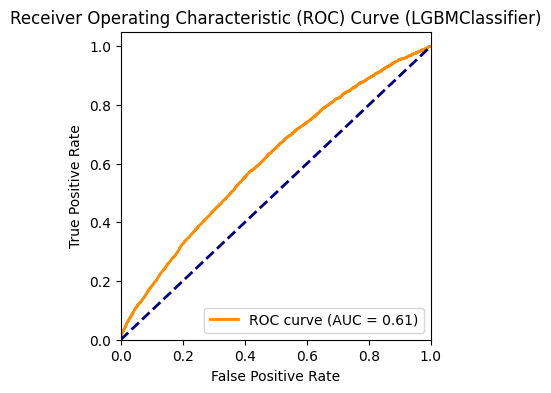

<IPython.core.display.Javascript object>

In [6]:
model = LGBMClassifier(n_jobs=-1, class_weight="balanced", use_missing=False)
final_pipe = Pipeline(steps=[("model", model)])


final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
y_pred_prob = final_pipe.predict_proba(X_test)[:, 1]
print("\n\n\nProbability: ", y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\n\n\nROC_AUC score: ", roc_auc)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (LGBMClassifier)")
plt.legend(loc="lower right")
plt.show()



<Figure size 800x800 with 0 Axes>

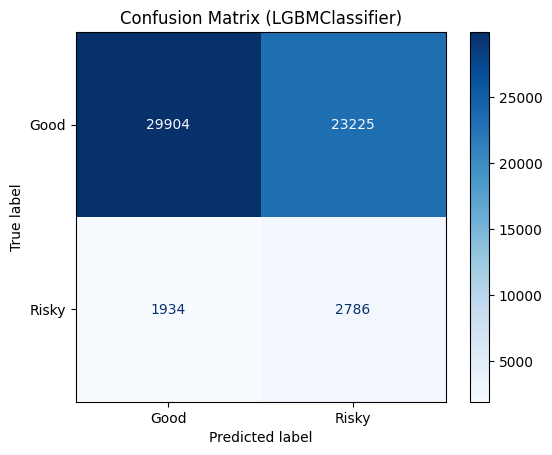

Classification report (LGBMClassifier):
---------------------------
               precision    recall  f1-score   support

        Good       0.94      0.56      0.70     53129
       Risky       0.11      0.59      0.18      4720

    accuracy                           0.57     57849
   macro avg       0.52      0.58      0.44     57849
weighted avg       0.87      0.57      0.66     57849



<IPython.core.display.Javascript object>

In [7]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["Good", "Risky"])
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_pipe.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.xticks(np.arange(2), ["Good", "Risky"])
plt.yticks(np.arange(2), ["Good", "Risky"])
plt.title("Confusion Matrix (LGBMClassifier)")
plt.show()
print("Classification report (LGBMClassifier):\n---------------------------\n", clr)

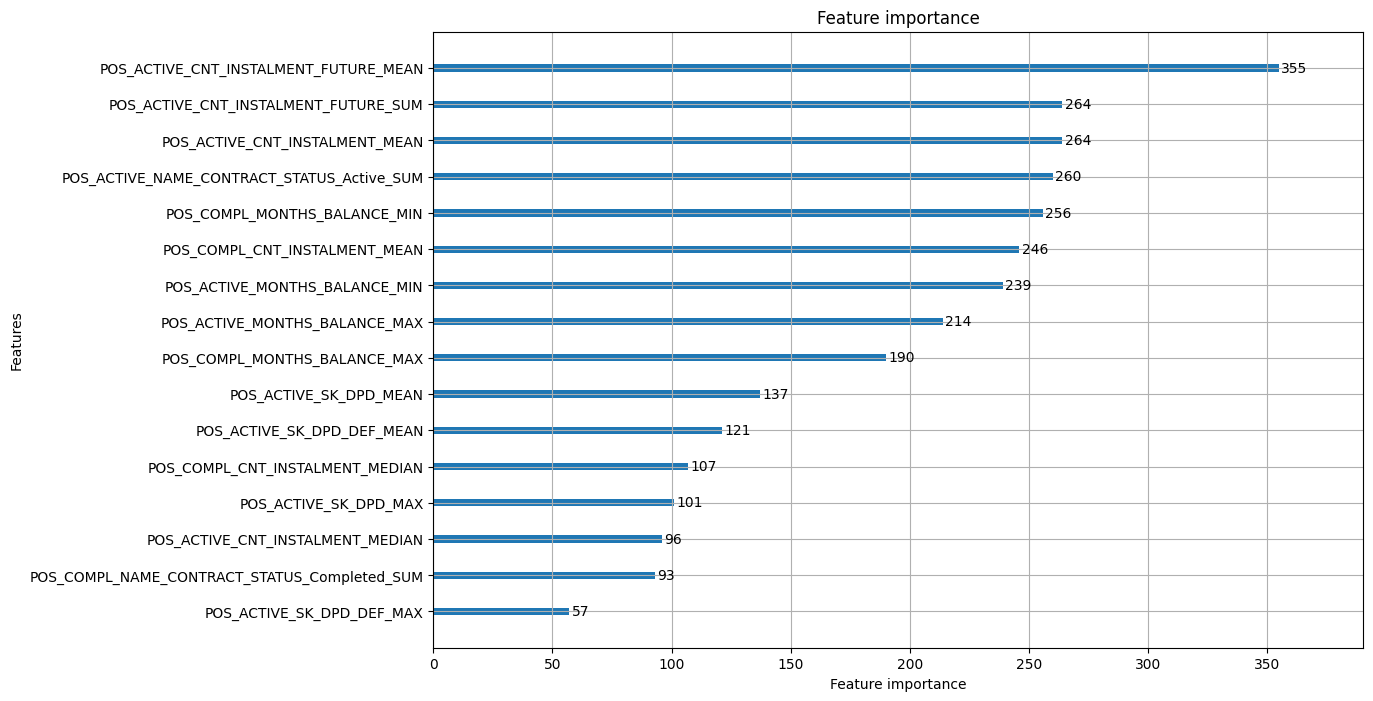

<IPython.core.display.Javascript object>

In [8]:
model_lgb = final_pipe.named_steps["model"]
lgb.plot_importance(model_lgb, figsize=(12, 8), max_num_features=30)
plt.show()

In [9]:
feature_imp = pd.DataFrame(
    sorted(zip(model_lgb.feature_importances_, X_train.columns)),
    columns=["Value", "Feature"],
)
features_df_posh = feature_imp.sort_values(by="Value", ascending=False)
selected_features_posh = list(
    features_df_posh[features_df_posh["Value"] >= 50]["Feature"]
)
selected_features_posh

['POS_ACTIVE_CNT_INSTALMENT_FUTURE_MEAN',
 'POS_ACTIVE_CNT_INSTALMENT_MEAN',
 'POS_ACTIVE_CNT_INSTALMENT_FUTURE_SUM',
 'POS_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM',
 'POS_COMPL_MONTHS_BALANCE_MIN',
 'POS_COMPL_CNT_INSTALMENT_MEAN',
 'POS_ACTIVE_MONTHS_BALANCE_MIN',
 'POS_ACTIVE_MONTHS_BALANCE_MAX',
 'POS_COMPL_MONTHS_BALANCE_MAX',
 'POS_ACTIVE_SK_DPD_MEAN',
 'POS_ACTIVE_SK_DPD_DEF_MEAN',
 'POS_COMPL_CNT_INSTALMENT_MEDIAN',
 'POS_ACTIVE_SK_DPD_MAX',
 'POS_ACTIVE_CNT_INSTALMENT_MEDIAN',
 'POS_COMPL_NAME_CONTRACT_STATUS_Completed_SUM',
 'POS_ACTIVE_SK_DPD_DEF_MAX']

<IPython.core.display.Javascript object>

In [10]:
posh_selected = posh_target_copy[["SK_ID_CURR"] + selected_features_posh]
posh_selected.to_csv("pos_cash_selected_features.csv", index=False, quoting=QUOTE_NONNUMERIC, quotechar='"')
posh_selected.head()

,SK_ID_CURR,POS_ACTIVE_CNT_INSTALMENT_FUTURE_MEAN,POS_ACTIVE_CNT_INSTALMENT_MEAN,POS_ACTIVE_CNT_INSTALMENT_FUTURE_SUM,POS_ACTIVE_NAME_CONTRACT_STATUS_Active_SUM,POS_COMPL_MONTHS_BALANCE_MIN,POS_COMPL_CNT_INSTALMENT_MEAN,POS_ACTIVE_MONTHS_BALANCE_MIN,POS_ACTIVE_MONTHS_BALANCE_MAX,POS_COMPL_MONTHS_BALANCE_MAX,POS_ACTIVE_SK_DPD_MEAN,POS_ACTIVE_SK_DPD_DEF_MEAN,POS_COMPL_CNT_INSTALMENT_MEDIAN,POS_ACTIVE_SK_DPD_MAX,POS_ACTIVE_CNT_INSTALMENT_MEDIAN,POS_COMPL_NAME_CONTRACT_STATUS_Completed_SUM,POS_ACTIVE_SK_DPD_DEF_MAX
0,100002,15.000000,24.000000,285.0,19.0,NaN,NaN,-19,-1,NaN,0.0,0.0,NaN,0,24.0,NaN,0
1,100003,6.230469,10.382812,162.0,26.0,-21.0,6.500000,-77,-19,-18.0,0.0,0.0,6.5,0,12.0,2.0,0
2,100004,3.000000,4.000000,9.0,3.0,-24.0,3.000000,-27,-25,-24.0,0.0,0.0,3.0,0,4.0,1.0,0
3,100006,9.609375,13.000000,173.0,18.0,-13.0,3.000000,-19,-1,-4.0,0.0,0.0,3.0,0,12.0,2.0,0
4,100007,9.351562,15.468750,580.0,62.0,-46.0,13.664062,-77,-1,-11.0,0.0,0.0,12.0,0,12.0,3.0,0


<IPython.core.display.Javascript object>

In [18]:
# Other models:
final_pipe_rf = Pipeline(
    steps=[("model", RandomForestClassifier(n_jobs=-1, class_weight="balanced"))]
)
final_pipe_rf.fit(X_train, y_train)
y_pred = final_pipe_rf.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
y_pred_prob_rf = final_pipe_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("RandomForest ROC AUC:", roc_auc_rf)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.91     53129
         1.0       0.10      0.14      0.12      4720

    accuracy                           0.83     57849
   macro avg       0.51      0.52      0.51     57849
weighted avg       0.85      0.83      0.84     57849

RandomForest ROC AUC: 0.5513859993313365


<IPython.core.display.Javascript object>

In [16]:
final_pipe_xgb = Pipeline(steps=[("model", XGBClassifier(n_jobs=-1))])
final_pipe_xgb.fit(X_train, y_train)
y_pred_xgb = final_pipe_xgb.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", report_xgb)

y_pred_prob_xgb = final_pipe_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print("XGBoost ROC AUC:", roc_auc_xgb)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     53129
         1.0       0.33      0.00      0.00      4720

    accuracy                           0.92     57849
   macro avg       0.63      0.50      0.48     57849
weighted avg       0.87      0.92      0.88     57849

XGBoost ROC AUC: 0.5960654248645206


<IPython.core.display.Javascript object>